In [3]:
# -------------------------------------------------------------
# Step 1: Import necessary libraries
# -------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
print("✅ Libraries imported.")


✅ Libraries imported.


In [4]:
# -------------------------------------------------------------
# Step 2: Load the raw dataset
# -------------------------------------------------------------
print("📥 Loading dataset...")

df = pd.read_csv("../data/processed/cleaned_house_data.csv")

print("✅ Dataset loaded successfully!")
print("Initial data shape:", df.shape)
print("\n🔍 Preview of data:")
print(df.head())


📥 Loading dataset...
✅ Dataset loaded successfully!
Initial data shape: (77, 7)

🔍 Preview of data:
     price  sqft  bedrooms  bathrooms    location  year_built  condition
0   495000  1527         2        1.5      Suburb        1956       Good
1   752000  2526         3        2.5    Downtown        1998  Excellent
2   319000  1622         2        1.5       Rural        1975       Fair
3  1210000  3102         4        3.0  Waterfront        2005  Excellent
4   462000  1835         2        2.0       Urban        1982       Good


In [5]:
# -------------------------------------------------------------
# Step 3: Understand structure — schema, datatypes, nulls
# -------------------------------------------------------------
print("\n📊 Data types and null value check:")
print(df.info())

print("\n❓ Any missing values?")
print(df.isnull().sum())



📊 Data types and null value check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       77 non-null     int64  
 1   sqft        77 non-null     int64  
 2   bedrooms    77 non-null     int64  
 3   bathrooms   77 non-null     float64
 4   location    77 non-null     object 
 5   year_built  77 non-null     int64  
 6   condition   77 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.3+ KB
None

❓ Any missing values?
price         0
sqft          0
bedrooms      0
bathrooms     0
location      0
year_built    0
condition     0
dtype: int64


In [6]:
# Step 3: Drop malformed rows (like the one with missing columns)
df = df.dropna()
df = df[df['price'] > 10000]  # basic sanity checks
df = df[df['sqft'] > 200]

In [7]:
# -------------------------------------------------------------
# Step 4: Standardize column names (basic cleanup)
# -------------------------------------------------------------
print("\n🧹 Cleaning column names (lowercase, underscores)...")

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("✅ Column names standardized:")
print(df.columns.tolist())



🧹 Cleaning column names (lowercase, underscores)...
✅ Column names standardized:
['price', 'sqft', 'bedrooms', 'bathrooms', 'location', 'year_built', 'condition']


In [8]:
# -------------------------------------------------------------
# Step 5: Basic stats check (spot outliers or issues)
# -------------------------------------------------------------
print("\n📈 Basic summary stats for numeric columns:")
print(df.describe())



📈 Basic summary stats for numeric columns:
              price         sqft   bedrooms  bathrooms   year_built
count  7.700000e+01    77.000000  77.000000  77.000000    77.000000
mean   5.532338e+05  2068.000000   2.701299   2.025974  1979.025974
std    2.651523e+05   522.756711   0.689488   0.643265    17.427273
min    2.490000e+05  1350.000000   2.000000   1.000000  1947.000000
25%    3.680000e+05  1680.000000   2.000000   1.500000  1965.000000
50%    4.950000e+05  1950.000000   3.000000   2.000000  1981.000000
75%    6.200000e+05  2280.000000   3.000000   2.500000  1992.000000
max    1.250000e+06  3250.000000   4.000000   3.500000  2010.000000



📊 Plotting distribution of house prices...


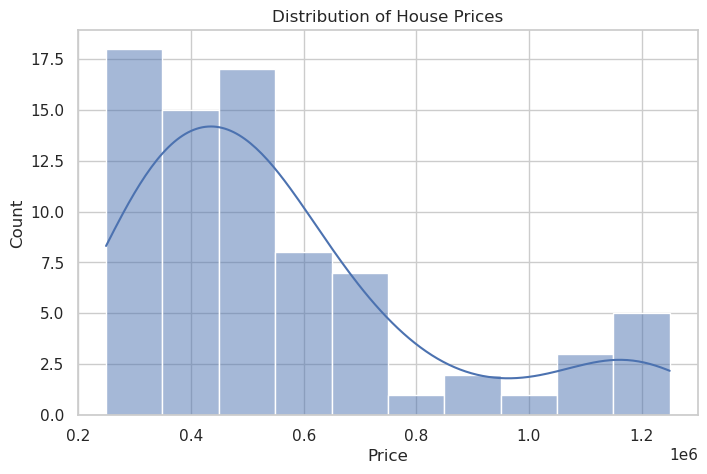

In [9]:
# -------------------------------------------------------------
# Step 6: Visual check for distributions (e.g. price, sqft)
# -------------------------------------------------------------
print("\n📊 Plotting distribution of house prices...")

plt.figure(figsize=(8, 5))
sns.histplot(df["price"], kde=True, bins=10)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


In [10]:
# -------------------------------------------------------------
# Step 7: Check for obvious data issues
# -------------------------------------------------------------
print("\n🔍 Looking for negative or unrealistic values...")

for col in ['price', 'sqft', 'bedrooms', 'bathrooms', 'year_built']:
    invalid = df[df[col] < 0]
    if not invalid.empty:
        print(f"⚠️ Found negative values in {col}:\n{invalid}")
    else:
        print(f"✅ No negative values found in {col}.")



🔍 Looking for negative or unrealistic values...
✅ No negative values found in price.
✅ No negative values found in sqft.
✅ No negative values found in bedrooms.
✅ No negative values found in bathrooms.
✅ No negative values found in year_built.


In [11]:
# -------------------------------------------------------------
# Step 8: Drop duplicates if any
# -------------------------------------------------------------
print("\n🧹 Checking for duplicate rows...")

duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"⚠️ Found {duplicates} duplicate rows. Dropping them...")
    df = df.drop_duplicates()
else:
    print("✅ No duplicate rows found.")



🧹 Checking for duplicate rows...
✅ No duplicate rows found.


In [12]:
# -------------------------------------------------------------
# Step 9: Save the cleaned version (optional here)
# -------------------------------------------------------------
print("\n💾 Saving cleaned version to interim file (optional step)...")

# Uncomment if you want to save at this point
# df.to_csv("../data/interim/cleaned_house_data_v1.csv", index=False)
print("✅ Data engineering preprocessing complete!")



💾 Saving cleaned version to interim file (optional step)...
✅ Data engineering preprocessing complete!
